In [2]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     -------------------------------------- 38.6/38.6 MB 104.3 kB/s eta 0:00:00


In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
# read data
df = pd.read_csv("UK_Traffic_Accidents_2015.csv",low_memory= False)
df.head() 

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814


In [73]:
df.corr()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
Location_Easting_OSGR,1.000000,-0.433536,0.999376,-0.435568,-0.379046,0.051229,0.015593,-0.036257,-0.004499,-0.403176,...,-0.019798,-0.021023,0.073373,-0.000086,-0.044503,-0.099444,-0.028257,-0.006911,-0.119557,0.008674
Location_Northing_OSGR,-0.433536,1.000000,-0.443053,0.999973,0.178804,-0.037594,-0.028368,0.032868,0.004241,0.136146,...,0.039089,0.024939,-0.026478,-0.010714,0.038591,0.097183,0.026539,0.005641,0.061463,-0.002112
Longitude,0.999376,-0.443053,1.000000,-0.444983,-0.391877,0.051015,0.016510,-0.035038,-0.004551,-0.412802,...,-0.017833,-0.021823,0.071890,-0.000449,-0.045083,-0.100588,-0.028154,-0.007234,-0.117743,0.009928
Latitude,-0.435568,0.999973,-0.444983,1.000000,0.176864,-0.037748,-0.028174,0.032994,0.004232,0.134562,...,0.039909,0.024918,-0.026428,-0.010694,0.038510,0.097023,0.026522,0.005536,0.061004,-0.001855
Police_Force,-0.379046,0.178804,-0.391877,0.176864,1.000000,-0.060330,-0.001503,0.013854,-0.001045,0.980276,...,-0.014242,0.023864,-0.079578,0.016417,0.048854,0.107323,0.030003,0.020449,0.255343,-0.005329
Accident_Severity,0.051229,-0.037594,0.051015,-0.037748,-0.060330,1.000000,0.070972,-0.065201,0.001485,-0.066088,...,0.018365,-0.003231,0.019140,-0.056668,0.009914,-0.008049,-0.000891,-0.002597,-0.093708,0.105744
Number_of_Vehicles,0.015593,-0.028368,0.016510,-0.028174,-0.001503,0.070972,1.000000,0.259028,0.001150,0.003504,...,0.016967,-0.019797,-0.051322,-0.071423,-0.035099,-0.052428,-0.014050,-0.041696,0.048217,-0.042326
Number_of_Casualties,-0.036257,0.032868,-0.035038,0.032994,0.013854,-0.065201,0.259028,1.000000,0.002011,0.021496,...,-0.002794,-0.008920,-0.030250,0.025691,-0.003800,0.022953,0.014087,0.006049,0.120625,-0.104572
Day_of_Week,-0.004499,0.004241,-0.004551,0.004232,-0.001045,0.001485,0.001150,0.002011,1.000000,-0.001342,...,-0.001332,0.000974,0.003795,0.007598,-0.012242,-0.023947,-0.003664,-0.006778,-0.016735,0.007277
Local_Authority_(District),-0.403176,0.136146,-0.412802,0.134562,0.980276,-0.066088,0.003504,0.021496,-0.001342,1.000000,...,-0.011025,0.022863,-0.093215,0.015149,0.051972,0.107445,0.032315,0.020050,0.270704,0.000439


In [6]:
df.shape

(140056, 32)

In [7]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')

In [3]:
df.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            27
Location_Northing_OSGR                           27
Longitude                                        27
Latitude                                         27
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             18
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [4]:
df.info()b 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140056 entries, 0 to 140055
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               140056 non-null  object 
 1   Location_Easting_OSGR                        140029 non-null  float64
 2   Location_Northing_OSGR                       140029 non-null  float64
 3   Longitude                                    140029 non-null  float64
 4   Latitude                                     140029 non-null  float64
 5   Police_Force                                 140056 non-null  int64  
 6   Accident_Severity                            140056 non-null  int64  
 7   Number_of_Vehicles                           140056 non-null  int64  
 8   Number_of_Casualties                         140056 non-null  int64  
 9   Date                                         140056 non-nul

### Outlines
1.Categorical features
2.Numerical features
3 Relationship between features

In [4]:
# CATEGORICAL FEATURES
cat_features = [f for f in df.columns if df[f].dtype == "object"]
cat_features

['Accident_Index',
 'Date',
 'Time',
 'Local_Authority_(Highway)',
 'LSOA_of_Accident_Location']

In [4]:
for f in cat_features:
    print(f,":",len(df[f].unique()))

Accident_Index : 140056
Date : 365
Time : 1440
Local_Authority_(Highway) : 207
LSOA_of_Accident_Location : 28738


In [6]:
for f in cat_features:
    if f != "Accident_Index":
        print(f,":",df[f].unique())

Date : ['12/01/2015' '13/01/2015' '09/01/2015' '15/01/2015' '18/01/2015'
 '16/01/2015' '20/01/2015' '23/01/2015' '22/01/2015' '21/01/2015'
 '25/01/2015' '24/01/2015' '28/01/2015' '30/01/2015' '29/01/2015'
 '01/02/2015' '31/01/2015' '03/02/2015' '04/02/2015' '07/02/2015'
 '08/02/2015' '05/02/2015' '06/02/2015' '09/02/2015' '10/02/2015'
 '13/02/2015' '14/02/2015' '16/02/2015' '17/02/2015' '11/02/2015'
 '19/02/2015' '20/02/2015' '21/02/2015' '22/02/2015' '23/02/2015'
 '25/02/2015' '26/02/2015' '01/03/2015' '28/02/2015' '02/03/2015'
 '03/03/2015' '06/03/2015' '04/03/2015' '10/03/2015' '11/03/2015'
 '12/03/2015' '13/03/2015' '15/03/2015' '16/03/2015' '17/03/2015'
 '18/03/2015' '05/03/2015' '19/03/2015' '20/03/2015' '21/03/2015'
 '22/03/2015' '23/03/2015' '14/03/2015' '24/03/2015' '25/03/2015'
 '29/03/2015' '27/03/2015' '27/05/2015' '28/03/2015' '31/03/2015'
 '02/04/2015' '10/04/2015' '12/04/2015' '11/04/2015' '09/04/2015'
 '13/04/2015' '14/04/2015' '07/01/2015' '08/01/2015' '05/01/2015'
 '0

In [5]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814


In [6]:
x = df.columns
x = np.array(x)
y = {"Feature":x}

In [7]:
f = pd.DataFrame(y)
f.head()

,Feature
0,Accident_Index
1,Location_Easting_OSGR
2,Location_Northing_OSGR
3,Longitude
4,Latitude


In [12]:
val = np.arange(1,33,1)
f["Label"] = val
f.head()

,Feature,Label
0,Accident_Index,1
1,Location_Easting_OSGR,2
2,Location_Northing_OSGR,3
3,Longitude,4
4,Latitude,5


In [14]:
f.to_csv("Variable_names_and_labels.csv",index= False)

In [33]:
# Drop nan values
df = df.dropna()

In [10]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814


In [6]:
df.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

In [7]:
# include month that the acciden must have occured
def get_month(col):
    return col.split('/')[1]
    
df["Month"] = df["Date"].apply(lambda x:get_month(x))
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Month
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,4,1,1,0,0,1,1,E01002825,01
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,1,1,1,0,0,1,1,E01002820,01
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,1,4,2,2,0,0,1,1,E01002833,01
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,1,1,2,0,0,1,2,E01002874,01
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,5,1,2,2,0,0,1,2,E01002814,01


In [8]:
df["Month"] = df["Month"].astype("int")

In [9]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Month
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,4,1,1,0,0,1,1,E01002825,1
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,1,1,1,0,0,1,1,E01002820,1
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,1,4,2,2,0,0,1,1,E01002833,1
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,1,1,2,0,0,1,2,E01002874,1
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,5,1,2,2,0,0,1,2,E01002814,1


C:\Users\user\anaconda3\envs\hamoye\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


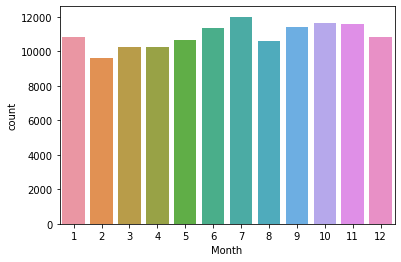

Mean:10928.67   Standard Deviation:701.77


In [10]:
sns.countplot(df["Month"])
plt.show()
print("Mean:{:.2f}   Standard Deviation:{:.2f}".format(df.Month.value_counts().mean(), 
                                                      df.Month.value_counts().std()))



commenr:Highest number of accidents occur in july and the lowest number of accident occur in febraury,the number of accidents towards the end of the year are king of higher

### Lets get to know the number of accident in the hours of the day


In [52]:
df["Time"].head()

0    18:45
1    07:50
2    18:08
3    07:40
4    07:30
Name: Time, dtype: object

In [54]:
def get_hour(col):
    return str(col).split(':')[0]
    
df["Hour"] = df["Time"].apply(lambda x:get_hour(x))
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Hour
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,slight,1,1,12/01/2015,...,0,4,1,1,0,0,1,1,E01002825,18
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,slight,1,1,12/01/2015,...,0,1,1,1,0,0,1,1,E01002820,07
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,slight,1,1,12/01/2015,...,1,4,2,2,0,0,1,1,E01002833,18
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,slight,1,1,13/01/2015,...,0,1,1,2,0,0,1,2,E01002874,07
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,serious,2,1,09/01/2015,...,5,1,2,2,0,0,1,2,E01002814,07


In [56]:
df = df.dropna()

In [57]:
df["Hour"] = df["Hour"].astype(int)
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_5184\886847050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hour"] = df["Hour"].astype(int)


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Hour
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,slight,1,1,12/01/2015,...,0,4,1,1,0,0,1,1,E01002825,18
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,slight,1,1,12/01/2015,...,0,1,1,1,0,0,1,1,E01002820,7
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,slight,1,1,12/01/2015,...,1,4,2,2,0,0,1,1,E01002833,18
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,slight,1,1,13/01/2015,...,0,1,1,2,0,0,1,2,E01002874,7
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,serious,2,1,09/01/2015,...,5,1,2,2,0,0,1,2,E01002814,7


In [58]:
#chage format of time
def change_hour_format(hr):
    if hr <= 12:
        return str(hr)+"am"
    else:
        return str(hr - 12) + "pm"
df["Hour"] = df["Hour"].apply(lambda x:change_hour_format(x))
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_5184\303296056.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hour"] = df["Hour"].apply(lambda x:change_hour_format(x))


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Hour
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,slight,1,1,12/01/2015,...,0,4,1,1,0,0,1,1,E01002825,6pm
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,slight,1,1,12/01/2015,...,0,1,1,1,0,0,1,1,E01002820,7am
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,slight,1,1,12/01/2015,...,1,4,2,2,0,0,1,1,E01002833,6pm
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,slight,1,1,13/01/2015,...,0,1,1,2,0,0,1,2,E01002874,7am
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,serious,2,1,09/01/2015,...,5,1,2,2,0,0,1,2,E01002814,7am


In [28]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Month', 'Hour'],
      dtype='object')

C:\Users\user\anaconda3\envs\hamoye\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


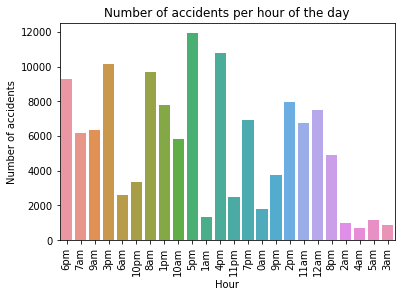

In [14]:
#visualize number of casualties in each hour
sns.countplot(df["Hour"])
plt.xticks(rotation = 90)
plt.ylabel("Number of accidents")
plt.title("Number of accidents per hour of the day")
plt.show()

comment : Most accident cases occur around 5pm and and 4 pm

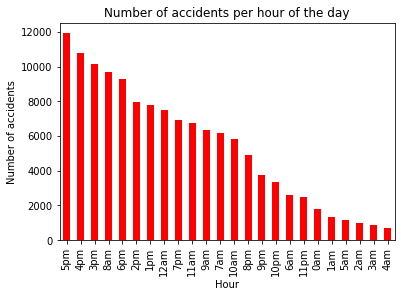

In [38]:
# display top hours with highest case of accidemts
plt.xticks(rotation = 90)
plt.ylabel("Number of accidents")
plt.title("Number of accidents per hour of the day")
df.groupby("Hour")["Hour"].count().sort_values(ascending = False).plot.bar(color = "red")
plt.show()

comment:Most accidents occur around 5pm,4pm,3pm,8pm.....as show on the diagram,This might because there might be a lock of traffic at this time or more people tend to move out around this time but there are obvioulsy a lot of casualities aroung 8am,this might because a lot of people tend to go and go their respective work places which in turn returns into road traffic

#### Since there are lot accidents in july compared to every other month,lets get to know which hour this accoidents must have occured

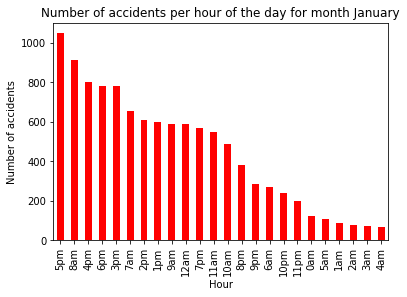

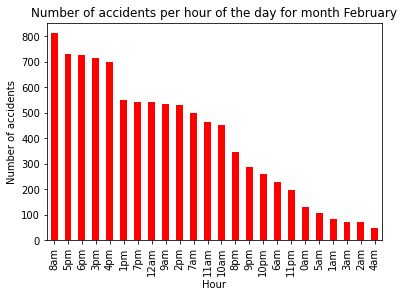

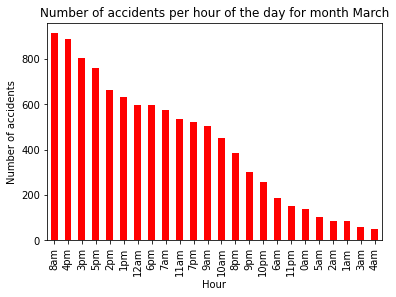

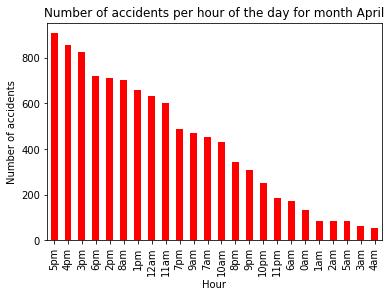

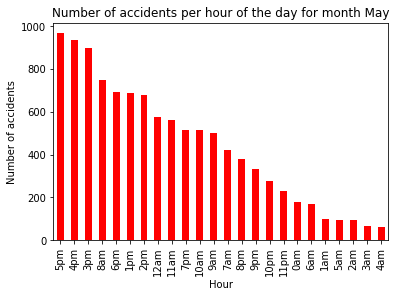

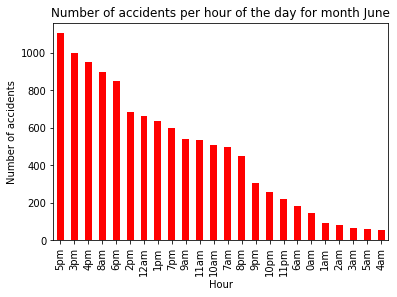

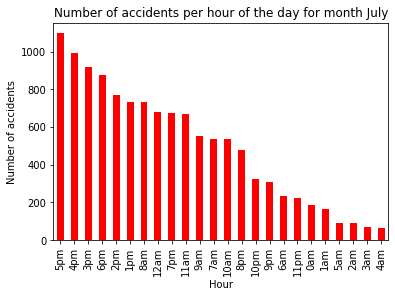

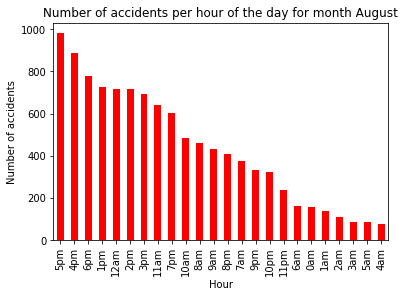

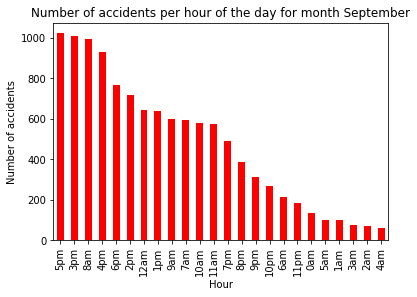

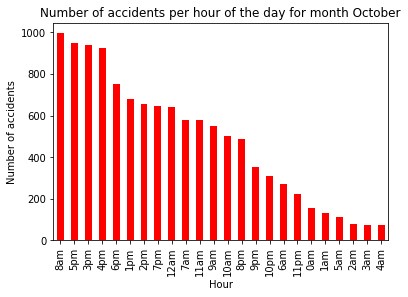

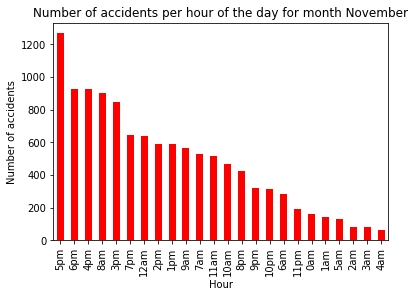

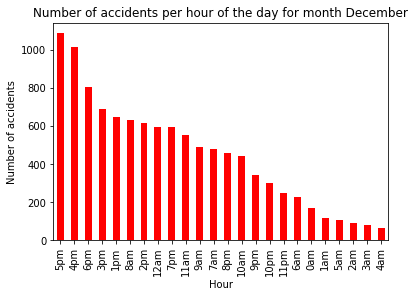

In [51]:
months = {1:"January",2:"February",3:"March",4:"April",5:"May",6:"June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
for i in range(1,13):
# display top hours with highest case of accidemts
        data = df.copy()
        data = data.loc[data["Month"] == i]
        plt.xticks(rotation = 90)
        plt.ylabel("Number of accidents")
        plt.title("Number of accidents per hour of the day for month " + str(months[i]))
        data.groupby("Hour")["Hour"].count().sort_values(ascending = False).plot.bar(color = "red")
        plt.show()


comment:most in accidents in feb,March and October occur around 8am

In [52]:
df["Local_Authority_(Highway)"].unique()

array(['E09000020', 'E09000033', 'E09000013', 'E09000001', 'E09000030',
       'E09000012', 'E09000028', 'E09000019', 'E09000007', 'E09000005',
       'E09000014', 'E09000003', 'E09000009', 'E09000018', 'E09000031',
       'EHEATHROW', 'E09000017', 'E09000026', 'E09000025', 'E09000002',
       'E09000016', 'E09000022', 'E09000006', 'E09000008', 'E09000032',
       'E09000023', 'E09000011', 'E09000004', 'E09000015', 'E09000010',
       'E09000021', 'E09000029', 'E09000024', 'E09000027', 'E10000006',
       'E06000008', 'E10000017', 'E06000009', 'E08000012', 'E08000015',
       'E08000014', 'E08000013', 'E08000011', 'E08000003', 'E08000006',
       'E08000008', 'E08000007', 'E08000001', 'E08000010', 'E08000009',
       'E08000002', 'E08000005', 'E08000004', 'E06000007', 'E06000050',
       'E06000049', 'E06000006', 'E06000048', 'E08000021', 'E08000020',
       'E08000024', 'E08000023', 'E08000022', 'E06000047', 'E06000005',
       'E10000023', 'E06000014', 'E08000035', 'E08000034', 'E080

In [53]:
df["LSOA_of_Accident_Location"].unique()

array(['E01002825', 'E01002820', 'E01002833', ..., 'W01000478',
       'W01000467', 'W01000432'], dtype=object)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131144 entries, 0 to 131591
Data columns (total 34 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               131144 non-null  object 
 1   Location_Easting_OSGR                        131144 non-null  float64
 2   Location_Northing_OSGR                       131144 non-null  float64
 3   Longitude                                    131144 non-null  float64
 4   Latitude                                     131144 non-null  float64
 5   Police_Force                                 131144 non-null  int64  
 6   Accident_Severity                            131144 non-null  int64  
 7   Number_of_Vehicles                           131144 non-null  int64  
 8   Number_of_Casualties                         131144 non-null  int64  
 9   Date                                         131144 non-nul

### Numerical features

In [18]:
# I will start with those with integers as data type
num_features = [f for f in df.columns if df[f].dtype == "int64" or df[f].dtype == "int32"]

In [19]:
num_features

['Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Day_of_Week',
 'Local_Authority_(District)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Month']

In [20]:
for f in num_features:
    print(f,":",len(df[f].unique()))

Police_Force : 43
Accident_Severity : 3
Number_of_Vehicles : 15
Number_of_Casualties : 22
Day_of_Week : 7
Local_Authority_(District) : 348
1st_Road_Class : 6
1st_Road_Number : 4147
Road_Type : 6
Speed_limit : 8
Junction_Detail : 10
Junction_Control : 5
2nd_Road_Class : 7
2nd_Road_Number : 3670
Pedestrian_Crossing-Human_Control : 4
Pedestrian_Crossing-Physical_Facilities : 7
Light_Conditions : 5
Weather_Conditions : 9
Road_Surface_Conditions : 6
Special_Conditions_at_Site : 9
Carriageway_Hazards : 7
Urban_or_Rural_Area : 2
Did_Police_Officer_Attend_Scene_of_Accident : 4
Month : 12


comment:Local_Authority_,2nd_Road_Number and 1st_Road_Number  all have a lot unique values,i will leave them for now,lets walk on those small amount of unique values

In [21]:
discrete_num = [f for f in num_features if len(df[f].unique()) <= 25]
discrete_num


['Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Day_of_Week',
 '1st_Road_Class',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Junction_Control',
 '2nd_Road_Class',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident',
 'Month']

In [23]:
for f in discrete_num:
    print(f,":",df[f].unique())

Accident_Severity : [3 2 1]
Number_of_Vehicles : [ 1  2  3  4  5  6  8  7 10  9 12 16 11 37 14]
Number_of_Casualties : [ 1  2  3  6  4  5 11  8  9  7 17 13 10 16 12 14 21 38 36 34 35 24]
Day_of_Week : [2 3 6 5 1 4 7]
1st_Road_Class : [5 6 4 3 1 2]
Road_Type : [6 1 3 2 7 9]
Speed_limit : [30 50 40 20 10 70 60  0]
Junction_Detail : [ 3  2  6  0  8  1  7  9  5 -1]
Junction_Control : [ 4  2 -1  3  1]
2nd_Road_Class : [ 6  3  5 -1  4  1  2]
Pedestrian_Crossing-Human_Control : [ 0  1  2 -1]
Pedestrian_Crossing-Physical_Facilities : [ 0  1  5  4  8  7 -1]
Light_Conditions : [4 1 6 7 5]
Weather_Conditions : [1 2 8 7 5 9 4 6 3]
Road_Surface_Conditions : [ 1  2  4  3  5 -1]
Special_Conditions_at_Site : [ 0  4  2  1  6  5  3  7 -1]
Carriageway_Hazards : [ 0  2  6  7  1  3 -1]
Urban_or_Rural_Area : [1 2]
Did_Police_Officer_Attend_Scene_of_Accident : [ 1  2  3 -1]
Month : [ 1  2  3  5  4  6  7  8  9 10 11 12]


### Lets study the severity of the accodents


In [25]:
df.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

In [11]:
# Change to real text
labels  = {"Accident_Severity":{1:"fatal",2:"serious",3:"slight"}}
df = df.replace(labels)
df["Accident_Severity"].head()
                                  


0     slight
1     slight
2     slight
3     slight
4    serious
Name: Accident_Severity, dtype: object

In [29]:
df["Accident_Severity"].value_counts()

slight     111112
serious     18570
fatal        1462
Name: Accident_Severity, dtype: int64

In [34]:
lst = list(df["Accident_Severity"].value_counts())

In [2]:
values = np.array(lst)
plt.figure(figsize = (11,7))
labels = ["slight","serious","fatal"]
plt.pie(values,labels=labels,autopct='%1.2f%%')
plt.legend()
plt.show()

NameError: name 'np' is not defined

comment: There are more cases of serious accidents,but just a little slight accident cases of the reported accidents

### What is the rate of occurence of fata accidents over the month in year 2015

In [36]:
df_fatal = df.loc[df["Accident_Severity"] == "fatal"]
df_fatal.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Month,Hour
813,201501CP00181,532700.0,181110.0,-0.089058,51.513339,48,fatal,2,1,22/06/2015,...,1,1,1,0,0,1,1,E01032739,6,8am
17376,201501TD00001,521920.0,189370.0,-0.241466,51.590000,1,fatal,1,1,04/01/2015,...,1,1,4,0,0,1,1,E01033572,1,7am
17377,201501TD00003,531590.0,178290.0,-0.106096,51.488256,1,fatal,2,1,11/01/2015,...,1,1,2,0,0,1,1,E01003108,1,6pm
17378,201501TD00004,534080.0,178050.0,-0.070345,51.485515,1,fatal,1,1,11/01/2015,...,4,1,1,0,0,1,1,E01003964,1,2am
17379,201501TD00005,532280.0,179600.0,-0.095673,51.499868,1,fatal,2,1,12/01/2015,...,1,1,1,0,0,1,1,E01003937,1,8am


In [66]:
x = df_fatal["Month"].value_counts()
x = list(x)
len(x)

12

In [67]:
left = [12, 8, 7, 10, 11,1,6,5,4,9,2,3]
len(left)

12

In [73]:
Z = [x for _,x in sorted(zip(left,x))]
Z


[121, 105, 94, 116, 118, 118, 136, 140, 112, 135, 123, 144]

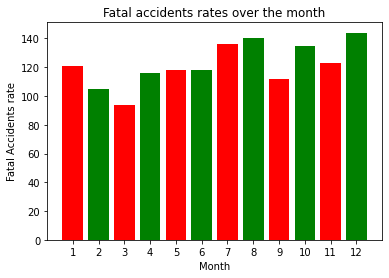

In [81]:

left =  np.arange(1,13,1)
height = np.array(Z)
tick_label = np.arange(1,13,1)

height_plot = sorted(height[:-1])[::-1] + height[-1:]

plt.bar(left, height,tick_label = tick_label,
        width = 0.8, color = ['red', 'green']) 

plt.xlabel('Month') 
plt.ylabel('Fatal Accidents rate') 
plt.title('Fatal accidents rates over the month') 
plt.show()

#### Number of vehicles

In [9]:
df["Number_of_Vehicles"].value_counts()

2     84615
1     41116
3     11064
4      2436
5       587
6       153
7        47
8        17
9         9
10        5
11        2
12        1
16        1
37        1
14        1
13        1
Name: Number_of_Vehicles, dtype: int64

In [12]:
df_no = df[["Number_of_Vehicles","Accident_Severity"]]
df_no.head()

,Number_of_Vehicles,Accident_Severity
0,1,slight
1,1,slight
2,1,slight
3,1,slight
4,2,serious


In [14]:
df.groupby("Accident_Severity")["Number_of_Vehicles"].value_counts()

Accident_Severity  Number_of_Vehicles
fatal              1                       701
                   2                       681
                   3                       161
                   4                        53
                   5                        16
                   6                         1
                   7                         1
                   11                        1
                   37                        1
serious            2                      9867
                   1                      8377
                   3                      1344
                   4                       295
                   5                        97
                   6                        35
                   7                        12
                   8                         5
                   9                         2
                   10                        2
                   11                        1
                   14 

C:\Users\user\anaconda3\envs\hamoye\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Number_of_Vehicles'>

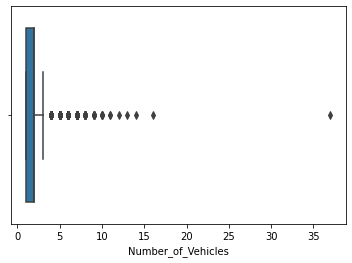

In [15]:
sns.boxplot(df["Number_of_Vehicles"])

In [24]:
df["Number_of_Vehicles"].dtype

dtype('int64')

In [27]:
no_of_vehi = list(df["Number_of_Vehicles"])
q3 = np.percentile(no_of_vehi,75,axis = 0)
q1 = np.percentile(no_of_vehi,25,axis = 0)
iqr = q3-q1
lower_fence = q1 - 1.5*(iqr)
higher_fence = q3 + 1.5*(iqr)
outliers_no_vehi = []
for i in no_of_vehi:
    if i < lower_fence:
        outliers_no_vehi.append(i)
    elif i > higher_fence:
        outliers_no_vehi.append(i)
    
        

In [29]:
max(outliers_no_vehi)

37

In [30]:
ls = set(outliers_no_vehi)

In [31]:
ls

{4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 37}

In [32]:
# if there more than three cars involved lets get to see the possible severity
df_n = df_no.loc[df["Number_of_Vehicles"] > 3]

In [33]:
df_n

,Number_of_Vehicles,Accident_Severity
159,4,slight
605,4,slight
610,4,slight
738,5,slight
1195,4,slight
...,...,...
139899,4,slight
139915,4,slight
139957,4,slight
139969,5,slight


In [35]:
df_n.groupby("Number_of_Vehicles")["Accident_Severity"].value_counts()

Number_of_Vehicles  Accident_Severity
4                   slight               2088
                    serious               295
                    fatal                  53
5                   slight                474
                    serious                97
                    fatal                  16
6                   slight                117
                    serious                35
                    fatal                   1
7                   slight                 34
                    serious                12
                    fatal                   1
8                   slight                 12
                    serious                 5
9                   slight                  7
                    serious                 2
10                  slight                  3
                    serious                 2
11                  fatal                   1
                    serious                 1
12                  slight                

### In the cases of fata accidents where there are more than 3 cars, What 

In [ ]:
# Lets get to visualoze the severity level of accidents based on the number of vehicles 
severit = df["Accident_Severity"].unique()
for f in severit:
    df_f = df_no.loc[df["Accident_Severity"] == f]
    df_f.groupby("")

#### 1st Road type

In [36]:
df["1st_Road_Class"].unique()

array([5, 6, 4, 3, 1, 2], dtype=int64)

In [37]:
labels = {"1st_Road_Class":{1:"Motorway",2:"A(M)",3:"A",4:"B",5:"C",6:"Unclassified"}}

In [41]:
df = df.replace(labels)

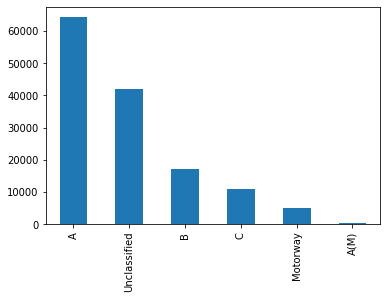

In [51]:
df_1st_road = df.loc[:,["1st_Road_Class","Accident_Severity"]]
df_1st_road["1st_Road_Class"].value_counts().plot.bar()
plt.show()

Comment:Most Accidents occur on class A roads,This is might because class A roads are mostly busy

### What time do accidents most occur based on different classes of roads 

In [60]:
df_time_a = df.loc[:,["1st_Road_Class","Hour","Accident_Severity"]]
df_time_a

,1st_Road_Class,Hour,Accident_Severity
0,C,6pm,slight
1,Unclassified,7am,slight
2,B,6pm,slight
3,B,7am,slight
4,A,7am,serious
...,...,...,...
131587,B,3pm,slight
131588,A,3pm,serious
131589,Unclassified,6pm,slight
131590,Unclassified,8am,slight


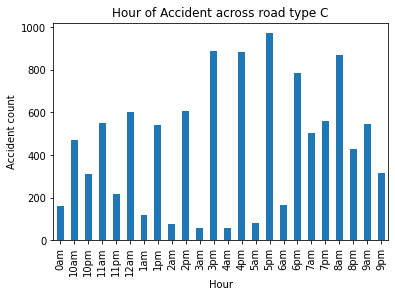

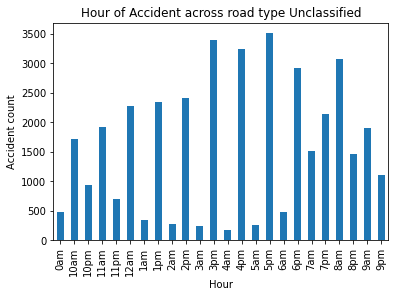

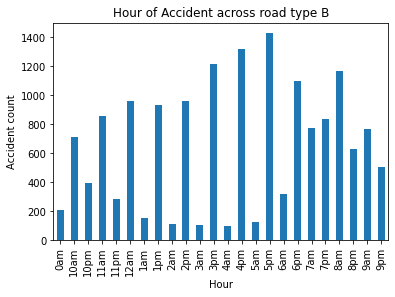

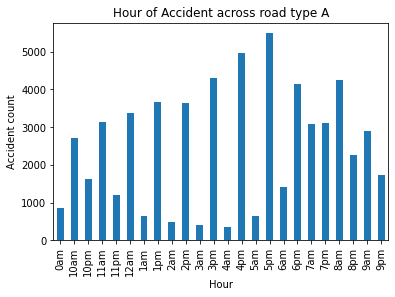

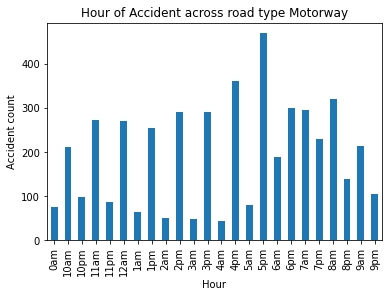

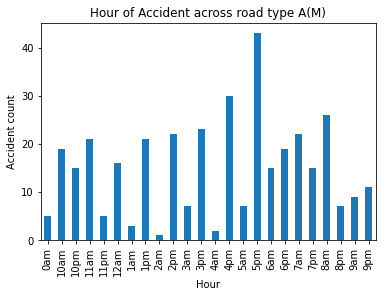

In [70]:
x = df["1st_Road_Class"].unique()
for i in x:
    df_time_a = df.loc[df["1st_Road_Class"] == i]
    plt.title("Hour of Accident across road type "+i)
    plt.ylabel("Accident count")
    df_time_a.groupby("Hour")["Hour"].count().plot.bar()
    plt.show()

In [71]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Hour
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,slight,1,1,12/01/2015,...,0,4,1,1,0,0,1,1,E01002825,6pm
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,slight,1,1,12/01/2015,...,0,1,1,1,0,0,1,1,E01002820,7am
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,slight,1,1,12/01/2015,...,1,4,2,2,0,0,1,1,E01002833,6pm
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,slight,1,1,13/01/2015,...,0,1,1,2,0,0,1,2,E01002874,7am
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,serious,2,1,09/01/2015,...,5,1,2,2,0,0,1,2,E01002814,7am


  ### Longitude and Latitude

In [74]:
# I will try to gelongt the location names based on the long and lat


In [75]:
!pip install geopy

     ------------------------------------ 118.9/118.9 kB 133.6 kB/s eta 0:00:00


In [ ]:
from geopy.geocoders import Nominatim
from geopy.point import Point
# instantiate Nomminatim APi
geolocator = Nominatim(user_agent="geoapiExercises")
lat = "51.505538"
long = "-0.198465"
location = geolocator.reverse(Point(lat,long))

In [82]:
location

Location(9, Campden Hill Road, Notting Hill, Royal Borough of Kensington and Chelsea, London, Greater London, England, W8 7EJ, United Kingdom, (51.5054031, -0.1985665, 0.0))

In [84]:
address = location.raw["address"]
address

{'house_number': '9',
 'road': 'Campden Hill Road',
 'suburb': 'Notting Hill',
 'city_district': 'Royal Borough of Kensington and Chelsea',
 'ISO3166-2-lvl8': 'GB-KEC',
 'city': 'London',
 'state_district': 'Greater London',
 'state': 'England',
 'ISO3166-2-lvl4': 'GB-ENG',
 'postcode': 'W8 7EJ',
 'country': 'United Kingdom',
 'country_code': 'gb'}

In [89]:
# get state and city
city = address.get('city','')
state = address.get('state','')
print(f"City:{city},state:{state}")

City:London,state:England


In [109]:
all_lat = df["Latitude"]
all_long = df["Longitude"]
Lat_Long = []
for lat,long in zip(all_lat,all_long):
    la_lo = []
    la_lo.append(lat)
    la_lo.append(long)
    Lat_Long.append(la_lo)

In [107]:

all_state = []
all_city = []
for lat_long in Lat_Long:
    location = geolocator.reverse(Point(str(lat_long[0]),str(lat_long[1])))
    address = location.raw["address"]
    city = address.get("city","")
    state = address.get("state","")
    all_state.append(state)
    all_city.append(city)
    
    

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /reverse?lat=51.501838&lon=-0.151352&format=json&addressdetails=1 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x000000FED05CE590>, 'Connection to nominatim.openstreetmap.org timed out. (connect timeout=1)'))

In [108]:
all_lat = df["Latitude"]
all_long = df["Longitude"]

In [111]:
all_state = []
all_city = []
Address = []
for lat_long in Lat_Long:
    location = geolocator.reverse(Point(str(lat_long[0]),str(lat_long[1])))
    address = location.raw["address"]
    Address.append(address)

KeyboardInterrupt: 

In [ ]:
def get_state(cols):
    lat = cols[0]
    long =  cols[1]
    location = geolocator.reverse(Point(str(lat),str(long)))
    address = location.raw["address"]
    city = address.get("city","")
    return city
    #state = address.get("state","")
    #all_state.append(state)
    #all_city.append(city)
df["State"] = df[["Latitude","Longitude"]].apply(get_state,axis = 1)
df.head()

In [ ]:
df["City"] = np.array(all_city)
df["State"] = np.array(all_state )

In [15]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,0,0,1,1,2,0,0,1,2,E01002874
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,0,5,1,2,2,0,0,1,2,E01002814


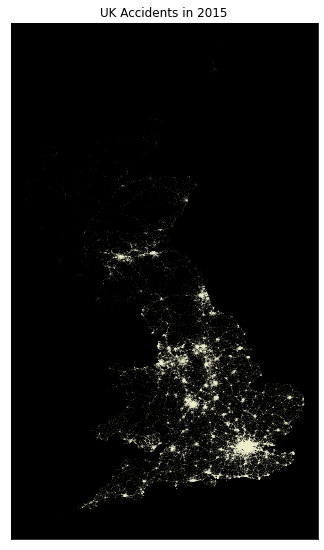

In [16]:
# Lets get to know where most of the accidents must have occured
plt.figure(figsize=(5.5,9.5))
plt.axes().set_facecolor("black")
plt.scatter(x = df["Longitude"], y = df["Latitude"],s=0.005, alpha= 0.25, color="lightyellow")
plt.title("UK Accidents in 2015")
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

comment:Seems the occurence of the accidents are highly concentrated in some areas

In [17]:
!pip install folium

     -------------------------------------- 95.0/95.0 kB 208.3 kB/s eta 0:00:00
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached urllib3-1.26.11-py2.py3-none-any.whl (139 kB)
  Using cached idna-3.3-py3-none-any.whl (61 kB)
  Using cached charset_normalizer-2.1.0-py3-none-any.whl (39 kB)


In [28]:
import folium
# lets get to see one of the location
m = folium.Map(location = [51.491836,-0.178838],zoom_start=4)
m

In [29]:
folium.Marker(location = [51.491836,-0.178838],popup="seattle",zoom_start=4).add_to(m)
m

In [30]:
df.shape

(140056, 32)

In [34]:
location = [df['Latitude'].mean(), df['Longitude'].mean()]

#A basemap is then created using the location to centre on and the zoom level to start.
m = folium.Map(location=location,zoom_start=15)

#Each location in the DataFrame is then added as a marker to the basemap points are then added to the map
for i in range(0,len(df)):
    folium.Marker([df['Latitude'].iloc[i],df['Longitude'].iloc[i]]).add_to(m)


In [ ]:
m